In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
from scipy.signal import find_peaks
import numpy as np
from scipy.interpolate import interp1d

In [2]:
df = pd.read_csv('all.csv', encoding='latin-1', nrows=481, skiprows=[1])
del df['Unnamed: 20']

In [3]:
col_names = []
order = [3, 5, 9, 1, 2, 4, 6, 7, 8, 10]
for i in order:
    col_names.append(f'{i}-wl')
    col_names.append(f'{i}-a')
df.columns = col_names
df

,3-wl,3-a,5-wl,5-a,9-wl,9-a,1-wl,1-a,2-wl,2-a,4-wl,4-a,6-wl,6-a,7-wl,7-a,8-wl,8-a,10-wl,10-a
0,700.041382,-0.000255,700.041382,0.023769,700.041382,0.009038,700.041382,0.001352,700.041382,0.000873,700.041382,0.000262,700.041382,0.010937,700.041382,0.004113,700.014343,0.003613,700.014343,0.019291
1,699.033203,-0.000796,699.033203,0.025051,699.033203,0.009596,699.033203,0.000902,699.033203,0.000624,699.033203,-0.000148,699.033203,0.011183,699.033203,0.003916,699.005981,0.003873,699.005981,0.020074
2,698.024658,-0.000521,698.024658,0.027058,698.024658,0.010281,698.024658,0.001246,698.024658,0.000548,698.024658,-0.000104,698.024658,0.012322,698.024658,0.004734,697.997253,0.003884,697.997253,0.020911
3,697.015808,-0.000527,697.015808,0.029462,697.015808,0.011077,697.015808,0.001157,697.015808,0.000910,697.015808,0.000130,697.015808,0.013594,697.015808,0.004945,696.988220,0.004064,696.988220,0.022193
4,696.006653,-0.000431,696.006653,0.031303,696.006653,0.011774,696.006653,0.001393,696.006653,0.000689,696.006653,0.000029,696.006653,0.014522,696.006653,0.005600,695.978821,0.004615,695.978821,0.023826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,224.062561,0.710753,224.062561,0.785260,224.062561,0.734588,224.062561,1.495316,224.062561,1.090969,224.062561,0.354671,224.062561,0.413075,224.062561,0.178821,223.949875,0.265603,223.949875,0.778979
477,222.962875,0.761356,222.962875,0.842922,222.962875,0.779937,222.962875,1.587933,222.962875,1.154618,222.962875,0.377581,222.962875,0.443401,222.962875,0.195153,223.007141,0.285445,223.007141,0.823807
478,222.020203,0.807443,222.020203,0.898849,222.020203,0.829994,222.020203,1.676133,222.020203,1.230355,222.020203,0.401210,222.020203,0.479898,222.020203,0.213957,222.064316,0.307866,222.064316,0.869601
479,221.077438,0.846156,221.077438,0.949397,221.077438,0.867596,221.077438,1.774636,221.077438,1.296340,221.077438,0.422396,221.077438,0.510813,221.077438,0.233549,220.964279,0.341623,220.964279,0.924401


(0.0, 1.0)

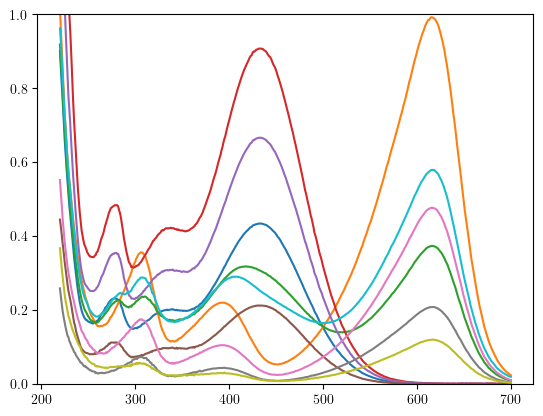

In [4]:
#interpolated = [[], []]
interpolated = []
for i in order:
    interpolated.append(interp1d(df[f'{i}-wl'], df[f'{i}-a']))
    #interpolated[1].append(i)
for i in order:
    plt.plot(df[f'{i}-wl'], interpolated[order.index(i)](df[f'{i}-wl']))
plt.ylim(0, 1)

In [5]:
acidic = [1, 2, 3, 4]
basic = [5, 6, 7, 8]
buffer = [9, 10]
ml4 = [3, 5, 9, 10]
names = ['Acidic', 'Basic', f'Buffer $pH=6.86$', f'Buffer $pH=7.3$']

Text(0, 0.5, 'A, $a.u.$')

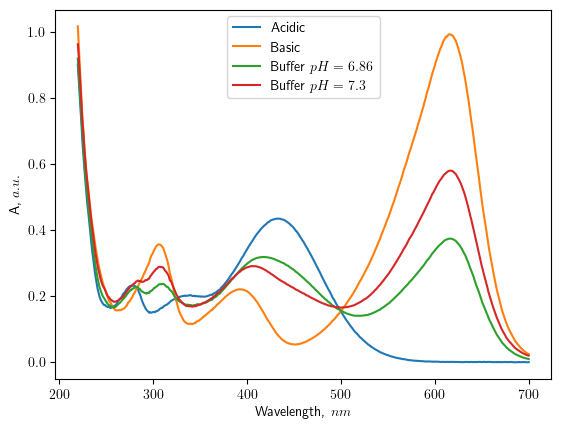

In [6]:
for i in range(len(ml4)):
    plt.plot(df[f'{ml4[i]}-wl'], df[f'{ml4[i]}-a'], label=names[i])
plt.legend()
plt.xlabel('Wavelength, $nm$')
plt.ylabel('A, $a.u.$')

In [16]:
a = 3
b = 9
intersect_ind = np.argwhere(
    np.diff(
        np.sign(
            interpolated[order.index(b)](df[f'{b}-wl']) -
            interpolated[order.index(a)](df[f'{a}-wl']
                                        ))))

intersect_ind = np.array(intersect_ind[0])
intersect_ind
'''
intersect_wl = df[f'{a}-wl'].iloc(intersect_ind)
intersect_wl
'''

"\nintersect_wl = df[f'{a}-wl'].iloc(intersect_ind)\nintersect_wl\n"

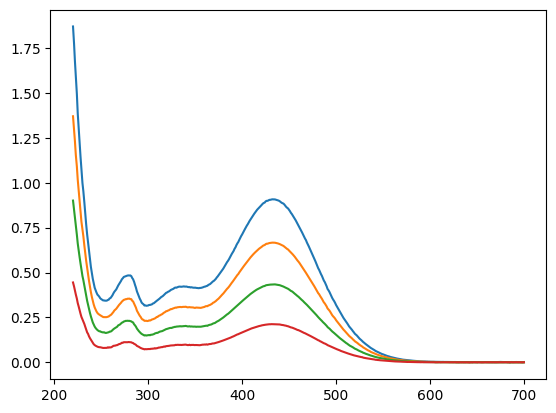

In [16]:
for i in acidic:
    plt.plot(df[f'{i}-wl'], df[f'{i}-a'])

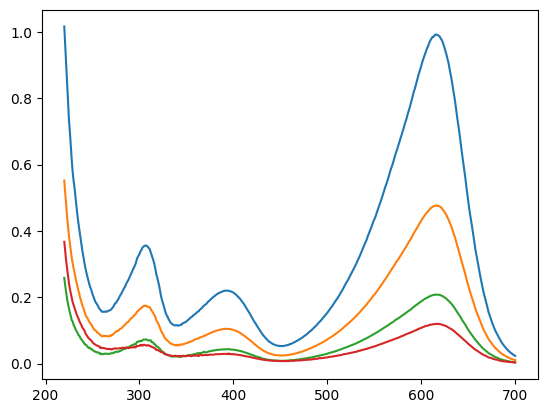

In [17]:
for i in basic:
    plt.plot(df[f'{i}-wl'], df[f'{i}-a'])

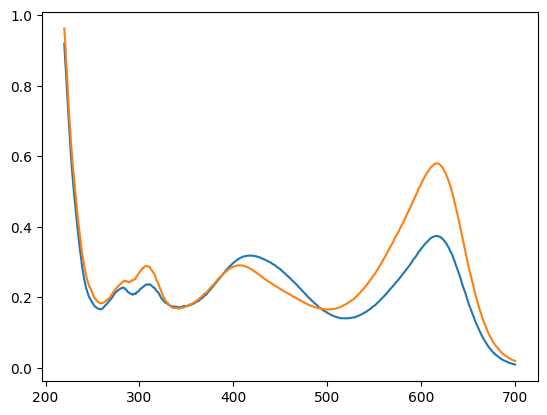

In [18]:
for i in buffer:
    plt.plot(df[f'{i}-wl'], df[f'{i}-a'])